In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [ ]:
!wget --no-clobber https://www.dropbox.com/s/qy1fi0xo50ib3ip/cats_and_dogs_filtered.zip?dl=0

--2023-05-31 10:13:20--  https://www.dropbox.com/s/qy1fi0xo50ib3ip/cats_and_dogs_filtered.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qy1fi0xo50ib3ip/cats_and_dogs_filtered.zip [following]
--2023-05-31 10:13:20--  https://www.dropbox.com/s/raw/qy1fi0xo50ib3ip/cats_and_dogs_filtered.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc07c580d1ae3b9108795983a244.dl.dropboxusercontent.com/cd/0/inline/B9H7dxHxNM40cj04FBPe3YcIjQ-QX-pOlGtN60BHEy2prcsK-3Wk5I5oPT-B0Hn6LW1kg7hniQWoxGYYjSXZ-6DAX3wInIcNseW2_jaxhD_Yg6056HqVFBKS0H_Wcy2VUfAMxlFMHGalGWsuvi-Vu7RLROy0BI4tXAjUYixmcxdRKA/file# [following]
--2023-05-31 10:13:20--  https://uc07c580d1ae3b9108795983a244.dl.dropboxusercontent.com/cd/0/inline/B9H7dxHxNM40cj04FBPe3YcIjQ-QX-pOl

In [ ]:
import os
import zipfile

local_zip = './cats_and_dogs_filtered.zip?dl=0'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir)) # os.listdir() trả về danh sách các tệp trong thư mục

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train')) # os.listdir(f'{base_dir}/train') trả về danh sách các tệp trong thư mục train

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation')) # os.listdir(f'{base_dir}/validation') trả về danh sách các tệp trong thư mục validation

Contents of base directory:
['validation', 'train']

Contents of train directory:
['panda', 'cats', 'dogs']

Contents of validation directory:
['panda', 'cats', 'dogs']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Thư mục với hình ảnh huấn luyện mèo / chó
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_panda_dir = os.path.join(train_dir, 'panda')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_panda_dir = os.path.join(validation_dir, 'panda')

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['panda', 'cats', 'dogs']

Contents of validation directory:
['panda', 'cats', 'dogs']


In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
train_panda_fnames = os.listdir( train_panda_dir )


print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(train_panda_fnames[:10])


print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total training panda images :', len(os.listdir( train_panda_dir ) ))


print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total validation panda images :', len(os.listdir( validation_panda_dir ) ))

['cat.605.jpg', 'cat.198.jpg', 'cat.717.jpg', 'cat.481.jpg', 'cat.831.jpg', 'cat.330.jpg', 'cat.935.jpg', 'cat.759.jpg', 'cat.120.jpg', 'cat.598.jpg']
['dog.268.jpg', 'dog.640.jpg', 'dog.42.jpg', 'dog.723.jpg', 'dog.769.jpg', 'dog.665.jpg', 'dog.939.jpg', 'dog.656.jpg', 'dog.603.jpg', 'dog.204.jpg']
['panda_00442.jpg', 'panda_00752.jpg', 'panda_00275.jpg', 'panda_00532.jpg', 'panda_00788.jpg', 'panda_00062.jpg', 'panda_00075.jpg', 'panda_00044.jpg', 'panda_00041.jpg', 'panda_00878.jpg']
total training cat images : 1000
total training dog images : 1000
total training panda images : 1000
total validation cat images : 500
total validation dog images : 500
total validation panda images : 500


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the paths to the training and validation data
train_cats_dir = 'cats_and_dogs_filtered/train/cats'
train_dogs_dir = 'cats_and_dogs_filtered/train/dogs'
train_panda_dir = 'cats_and_dogs_filtered/train/panda'
validation_cats_dir = 'cats_and_dogs_filtered/validation/cats'
validation_dogs_dir = 'cats_and_dogs_filtered/validation/dogs'
validation_panda_dir = 'cats_and_dogs_filtered/validation/panda'


# Define the size of the images
img_width, img_height = 50, 50

# Define the number of samples to use for PCA
n_samples = 1000

# Load the images and convert them to arrays
def load_images(directory):
    images = []
    for filename in os.listdir(directory)[:n_samples]:
        img = load_img(os.path.join(directory, filename), target_size=(img_width, img_height))
        x = img_to_array(img)
        images.append(x.flatten())
    return np.array(images)

# Load the training and validation images
train_cats = load_images(train_cats_dir)
train_dogs = load_images(train_dogs_dir)
train_panda = load_images(train_panda_dir)
validation_cats = load_images(validation_cats_dir)
validation_dogs = load_images(validation_dogs_dir)
validation_panda = load_images(validation_panda_dir)

# Concatenate the training and validation images
X_train = np.concatenate((train_cats, train_dogs,train_panda)) #
X_validation = np.concatenate((validation_cats, validation_dogs, validation_panda))  #

# Center the data by subtracting the mean
X_train_centered = X_train - np.mean(X_train, axis=0)
X_validation_centered = X_validation - np.mean(X_train, axis=0)

y_train = 1000*[0]+1000*[1]  +1000*[2]
y_validation = 500*[0]+500*[1]  +500*[2]

# Perform PCA to reduce the dimensionality of X_train to 3 dimensions
pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train_centered)
X_validation_reduced = pca.transform(X_validation_centered)


print(X_train_reduced.shape)
print(X_validation_reduced.shape)


(3000, 3)
(1500, 3)


In [ ]:
print(X_train_centered.shape)

y_train = np.array(y_train)
print(y_train.shape)

(3000, 7500)
(3000,)


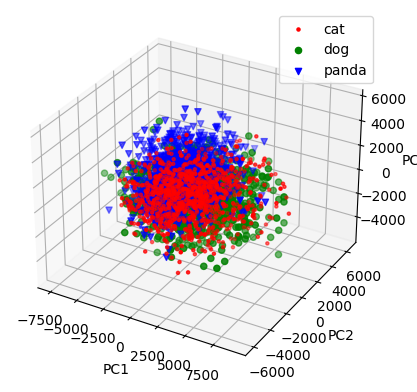

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the colors for each class
colors = {'cat': 'red', 'dog': 'green', 'panda': 'blue'}

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_train_reduced[:train_cats.shape[0], 0],
           X_train_reduced[:train_cats.shape[0], 1],
           X_train_reduced[:train_cats.shape[0], 2],
           color=colors['cat'], marker='.', label='cat')
ax.scatter(X_train_reduced[train_cats.shape[0]:train_cats.shape[0] + train_dogs.shape[0], 0],
           X_train_reduced[train_cats.shape[0]:train_cats.shape[0] + train_dogs.shape[0], 1],
           X_train_reduced[train_cats.shape[0]:train_cats.shape[0] + train_dogs.shape[0], 2],
           color=colors['dog'], marker='o', label='dog')
ax.scatter(X_train_reduced[train_cats.shape[0] + train_dogs.shape[0]:, 0],
           X_train_reduced[train_cats.shape[0] + train_dogs.shape[0]:, 1],
           X_train_reduced[train_cats.shape[0] + train_dogs.shape[0]:, 2],
           color=colors['panda'], marker='v', label='panda')

# Set the labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=100)
lorg.fit(X_train_centered,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [ ]:
y_pred = lorg.predict(X_validation_centered)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Calculate the accuracy of the model

accuracy = accuracy_score(y_validation, y_pred)
print("Test accuracy:", accuracy)

# Calculate the precision of each class
precision = precision_score(y_validation, y_pred, average=None)

# Print the precision of each class
print("Precision of each class:", precision)

# Calculate the recall of each class
recall = recall_score(y_validation, y_pred, average=None)

# Print the recall of each class
print("Recall of each class:", recall)

# Print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_validation, y_pred))

Test accuracy: 0.45
Precision of each class: [0.42492013 0.40283401 0.55263158]
Recall of each class: [0.532 0.398 0.42 ]
Confusion matrix:
[[266 155  79]
 [210 199  91]
 [150 140 210]]


# Phân cụm

In [ ]:
from sklearn.cluster import KMeans # Thư viện hỗ trợ phân cụm
from collections import Counter # Thư viện hỗ trợ đếm

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**số lượng điểm dữ liệu được phân vào cluster**

In [ ]:
# Đếm số lượng điểm dữ liệu trong từng cụm
cluster_counts = Counter(labels)

# In số lượng điểm dữ liệu trong từng cụm
for cluster, count in cluster_counts.items():
    print("Cluster {}: {}".format(cluster, count))


Cluster 1: 1006
Cluster 0: 1117
Cluster 2: 877


In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

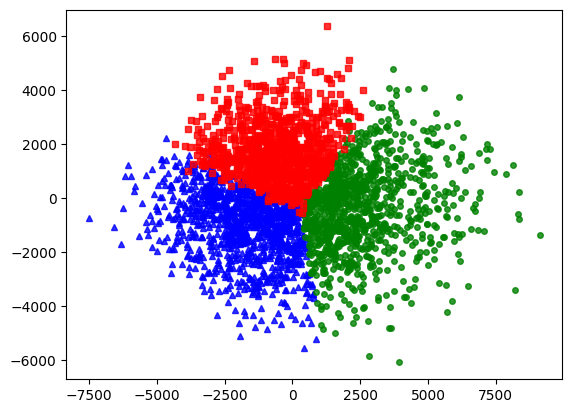

In [ ]:
kmeans_display(X_train_reduced, labels) # X_train_reduced là dữ liệu sau khi giảm chiều

SVM

In [ ]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
base_dir = 'cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

categories = ['cats', 'dogs', 'panda']

train_data = []
test_data = []

for category in categories:
  path = os.path.join(train_dir, category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    animal_img = cv2.imread(imgpath, 0)
    animal_img = cv2.resize(animal_img, (150,150))
    image = np.array(animal_img).flatten()
    train_data.append([image, label])

for category in categories:
  path = os.path.join(validation_dir, category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    animal_img = cv2.imread(imgpath, 0)
    animal_img = cv2.resize(animal_img, (150,150))
    image = np.array(animal_img).flatten()
    test_data.append([image, label])

In [ ]:
import random

random.shuffle(train_data)
train_features = [] #X_train
train_labels = [] #y_train

for feature, label in train_data:
  train_features.append(feature)
  train_labels.append(label)

random.shuffle(test_data)
test_features = [] #X_test
test_labels = [] #y_test

for feature, label in test_data:
  test_features.append(feature)
  test_labels.append(label)

In [ ]:
print( train_features)

[array([127, 128, 129, ..., 117, 104,  94], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([43, 42, 49, ..., 55, 59, 63], dtype=uint8), array([ 53,  55,  59, ..., 114, 113, 111], dtype=uint8), array([125, 122,  74, ..., 157, 141, 131], dtype=uint8), array([ 52,  52,  50, ..., 215, 220, 224], dtype=uint8), array([146, 148, 168, ...,  11,  14,  10], dtype=uint8), array([152, 155, 147, ..., 204, 200,  93], dtype=uint8), array([254, 254, 246, ..., 253, 252, 255], dtype=uint8), array([16, 16, 18, ..., 67, 72, 63], dtype=uint8), array([ 96,  35,  29, ..., 166, 128, 139], dtype=uint8), array([116, 103, 102, ..., 142, 151, 165], dtype=uint8), array([149, 147, 148, ..., 160, 154, 162], dtype=uint8), array([ 99, 101, 102, ..., 113, 113, 112], dtype=uint8), array([188, 209, 215, ...,  98, 102,  47], dtype=uint8), array([103,  61,  55, ..., 173, 174, 182], dtype=uint8), array([105, 106, 103, ...,  89,  83,  92], dtype=uint8

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


model = SVC(C = 1, kernel = "poly")
model.fit(train_features, train_labels)

prediction = model.predict(test_features)



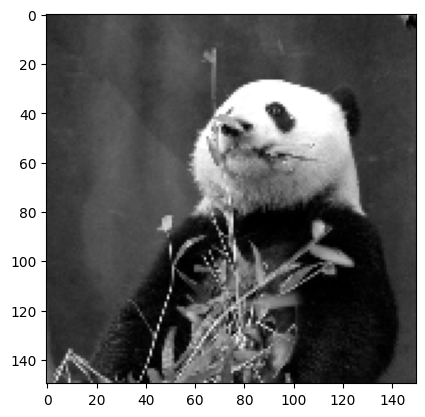

In [ ]:
my_animal = train_features[3].reshape(150, 150)
plt.imshow(my_animal, cmap = 'gray')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report( prediction,test_labels))

              precision    recall  f1-score   support

           0       0.59      0.42      0.49       710
           1       0.46      0.36      0.40       637
           2       0.16      0.52      0.25       153

    accuracy                           0.40      1500
   macro avg       0.40      0.43      0.38      1500
weighted avg       0.49      0.40      0.43      1500

